# Einführung Data Science - Praktikum 03 - Superhero Analysis

In [91]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Daten laden
1. Datensätze von Moodle laden
2. Unterordner "datasets" erstellen und Datensätze reinkopieren
3. Pfad vorbereiten
4. Datensätze mit pandas als DataFrame einlesen

In [92]:
# your code here

import pandas as pd
import os

# Pfad zum Ordner mit den Datensätzen
path = "datasets"

# Erstelle den Ordner, wenn er noch nicht existiert
if not os.path.exists(path):
    os.mkdir(path)

# Lade die Datei von Moodle und speichere sie im Ordner "datasets"
with open("marvel-wikia-data_json.json", "r") as file:
    data = file.read()
    with open(os.path.join(path, "marvel-wikia-data_json.json"), "w") as outfile:
        outfile.write(data)

# Lese den Datensatz mit pandas als DataFrame ein
df = pd.read_json(os.path.join(path, "marvel-wikia-data_json.json"))



In [93]:
cwd = os.getcwd()
file_marvel = "marvel_wikia.json"
file_path_marvel = os.path.join(cwd, 'dataset', file_marvel)


## Datensätze erkunden
1. Spaltennamen ausgeben lassen

In [94]:
# your code here

# Lese den Datensatz mit pandas als DataFrame ein
df = pd.read_json(os.path.join(path, "marvel-wikia-data_json.json"))
# Ausgabe der Spaltennamen
print(df.columns)


Index(['align', 'alive', 'appearances', 'eye', 'first appearance', 'gsm',
       'hair', 'id', 'name', 'page_id', 'sex', 'urlslug', 'year'],
      dtype='object')


2. Ersten 5 Einträge ansehen

In [95]:
# your code here
print(df.head(5))


                align              alive  appearances         eye  \
0     good characters  living characters       4043.0  hazel eyes   
1     good characters  living characters       3360.0   blue eyes   
2  neutral characters  living characters       3061.0   blue eyes   
3     good characters  living characters       2961.0   blue eyes   
4     good characters  living characters       2258.0   blue eyes   

  first appearance   gsm        hair                id  \
0           aug-62  None  brown hair   secret identity   
1           mar-41  None  white hair   public identity   
2           oct-74  None  black hair   public identity   
3           mar-63  None  black hair   public identity   
4           nov-50  None  blond hair  no dual identity   

                                  name  page_id              sex  \
0            spider-man (peter parker)     1678  male characters   
1      captain america (steven rogers)     7139  male characters   
2  wolverine (james \"logan\" ho

3. Welche Informationen liefern describe() und info()?

**HIER IHRE ANTWORTEN ZU PUNKT 3:**

**Your Text hier**
- Die Methode describe() gibt eine Zusammenfassung der statistischen Informationen über den DataFrame zurück, wie z.B. Anzahl, Mittelwert, Standardabweichung, Minimum und Maximum für numerische Spalten. Sie kann auch für nicht-numerische Spalten verwendet werden, um z.B. die Anzahl der einzigartigen Werte, das häufigste Element und die Anzahl der häufigsten Elemente zu ermitteln.

- Die Methode info() gibt eine Zusammenfassung der Informationen über den DataFrame zurück, wie z.B. die Anzahl der Zeilen und Spalten, die Datentypen der Spalten und die Anzahl der nicht-null-Werte in jeder Spalte. Sie gibt auch an, ob es fehlende Werte im DataFrame gibt oder nicht.

4. Untersuche die Spalte "name"

In [96]:
# your code here
print(df['name'].unique())
#print(df['name'])

['spider-man (peter parker)' 'captain america (steven rogers)'
 'wolverine (james \\"logan\\" howlett)' ...
 'tinkerer (skrull) (earth-616)' 'tk421 (spiderling) (earth-616)'
 'yologarch (earth-616)']


5. Die Spalte "name" soll so überschrieben werden, dass nur noch der Superhelden-Alias vorhanden ist.

In [97]:
data_dc = df
updated_names = []
for name in data_dc['name']:
    # your code here
    # Spalte "name" nur bis zum ersten "(" abschneiden
    new_name = name.split('(')[0].strip()
    updated_names.append(new_name)
    

data_dc['name'] = updated_names
print(updated_names)

['spider-man', 'captain america', 'wolverine', 'iron man', 'thor', 'benjamin grimm', 'reed richards', 'hulk', 'scott summers', 'jonathan storm', 'henry mccoy', 'susan storm', 'namor mckenzie', 'ororo munroe', 'clinton barton', 'matthew murdock', 'stephen strange', 'mary jane watson', 'john jonah jameson', 'robert drake', 'henry pym', 'charles xavier', 'warren worthington iii', 'piotr rasputin', 'wanda maximoff', 'nicholas fury', 'janet van dyne', 'jean grey', 'natalia romanova', 'kurt wagner', 'vision', 'may reilly', 'katherine pryde', 'carol danvers', 'jennifer walters', 'emma frost', 'frank castle', 'luke cage', 'rogue', 'conan', 'joseph robertson', 'pietro maximoff', 'hercules', 'victor von doom', 'max eisenhardt', 'elizabeth braddock', 'norrin radd', 'norman osborn', 'eugene thompson', 'simon williams', 'samuel guthrie', 'james buchanan barnes', 'remy lebeau', 'daniel rand', 'nathan summers', 'elizabeth brant', 'richard jones', 'edwin jarvis', 'alexander summers', 'patricia walker'

6. Wieviele Namenseinträge gibt es insgesamt? Wieviele unterschiedliche Namenseinträge gibt es?

In [98]:
# your code here
total_entries = df['name'].count()
print('Gesamtzahl der Namenseinträge:', total_entries)

unique_entries = df['name'].nunique()
print('Anzahl der unterschiedlichen Namenseinträge:', unique_entries)

Gesamtzahl der Namenseinträge: 16376
Anzahl der unterschiedlichen Namenseinträge: 15359


Der folgende Code extrahiert die mehrfach vorkommenden Namen.

In [112]:
duplicates = data_dc[data_dc.duplicated(subset=['name'], keep=False)]


7. Sortiere das neue DataFrame "duplicates" nach Namen und gebe die ersten 10 Einträge aus. Wieso kommen manche Superhelden mehrfach vor?
**ANTWORT:** 

***your text hier***
- Es ist möglich, dass manche Superhelden in verschiedenen Comics oder Serien vorkommen und daher mehrfach in der Datenbank auftauchen. 

In [117]:
# your code here
print(duplicates['name'].head(10))

1     captain america
2           wolverine
3            iron man
4                thor
5      benjamin grimm
6       reed richards
7                hulk
8       scott summers
9      jonathan storm
10        henry mccoy
Name: name, dtype: object


## Weiter Erkunden

Im folgenden konzentrieren wir uns auf den Marvel-Datensatz.

### Häufig genutzte Pandas Methoden dazu:
- `.value_counts("my_column_name")` --> gibt die Häufigkeit aller Einträge der jeweiligen Spalte wieder
- `.sort_values("my_column_name")` --> sortiert ein DataFrame nach den werten der jeweiligen Spalte (es können auch mehrere Spalten als Liste angegeben werden. Achtung: Pandas sortiert immer aufsteigend. Für eine absteigende Reihenfolge mit noch `ascending=False` hinzugefügt werden.
- Nutzung von masken! --> Funktioniert ähnlich wie bei numpy. `mask = df["my_column_name"] > 15` gibt eine Maske mit Booleans aus, die wir dann wieder einsetzten können um die Werte zu erhalten die wir suchen.

1. Wie viele weibliche und wie viele männliche Helden gibt es?

In [131]:
# your code here
# Lese den Datensatz mit pandas als DataFrame ein
df = pd.read_json(os.path.join(path, "marvel-wikia-data_json.json"))
# Ausgabe der Spaltennamen
#print(df.columns)
print(df['sex'].value_counts())




male characters           11638
female characters          3837
agender characters           45
genderfluid characters        2
Name: sex, dtype: int64


Erzeugen Sie dazu einen Barplot:

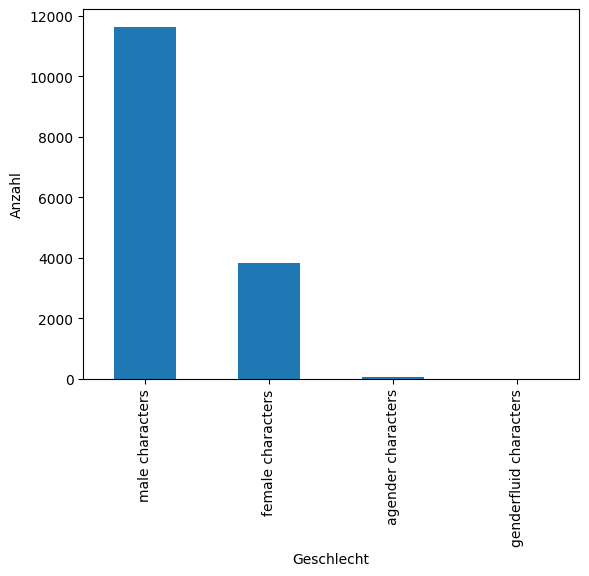

In [132]:
# your code here
gender_counts = df['sex'].value_counts()

# Barplot erstellen
gender_counts.plot(kind='bar')

# Achsenbeschriftung 
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl')

# Diagramm anzeigen
plt.show()

2. Wie viele gute/böse Helden gibt es ("align")?

In [137]:
# your code here
print(df['align'].value_counts())

bad characters        6720
good characters       4636
neutral characters    2208
Name: align, dtype: int64


Erzeugen Sie dazu einen Barplot:

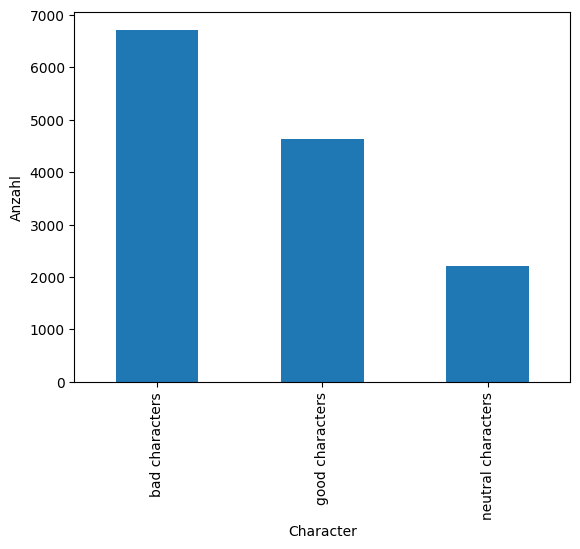

In [144]:
# your code here
align = df['align'].value_counts()
# Barplot erstellen
align.plot(kind='bar')

# Achsenbeschriftung 
plt.xlabel('Character')
plt.ylabel('Anzahl')

# Diagramm anzeigen
plt.show()

3. Was ist die häufigste Augenfarbe?

In [145]:
# your code here
haufigste_augenfarbe = df['eye'].value_counts().index[0]
print("Die häufigste Augenfarbe ist: ", haufigste_augenfarbe)

Die häufigste Augenfarbe ist:  blue eyes


Erzeugen Sie dazu einen Barplot, der ersten 10 Einträge:

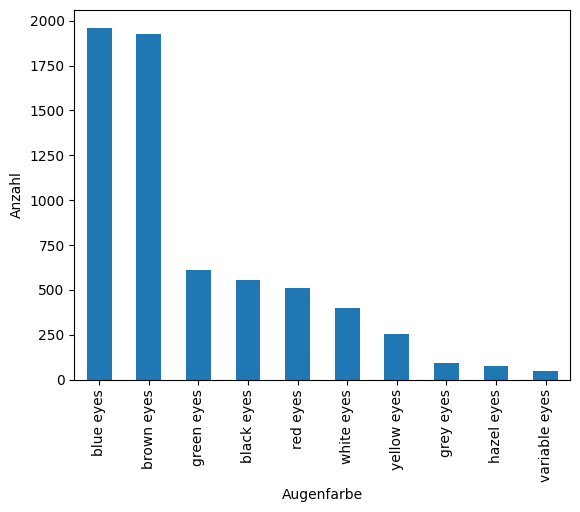

In [149]:
# your code here
haufigste_augenfarbe = df['eye'].value_counts().head(10)
# Barplot erstellen
haufigste_augenfarbe.plot(kind='bar')

# Achsenbeschriftung 
plt.xlabel('Augenfarbe')
plt.ylabel('Anzahl')

# Diagramm anzeigen
plt.show()


4. Welche Verteilung von gut/böse/neutral besteht bei den blauäugigen Superhelden? (Masken nutzen!)

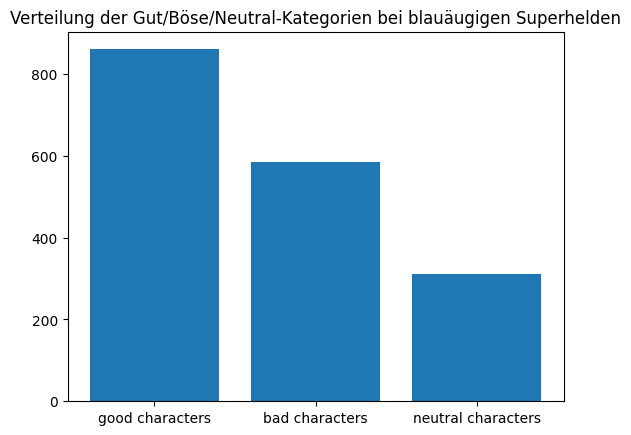

In [167]:
# your code here

blue_eyes_mask = df['eye'].str.lower() == 'blue eyes'
blue_eyes_df = df[blue_eyes_mask]

alignment_mask = blue_eyes_df['align'].isin(['good characters', 'bad characters', 'neutral characters'])
alignment_df = blue_eyes_df[alignment_mask]

alignment_counts = alignment_df['align'].value_counts()
plt.bar(alignment_counts.index, alignment_counts.values)
plt.title('Verteilung der Gut/Böse/Neutral-Kategorien bei blauäugigen Superhelden')
plt.show()


## Daten und Zeiten
Daten und Zeiten werden in sehr vielen verschiedenen Formaten und Stilen angegeben. Das macht ein Vergleichen schwer bis unmöglich. Darum müssen solche Einträge häufig vereinheitlicht werden.

Es gibt in Pandas viele Möglichkeiten Daten/Zeiten zu lesen und umzuwandeln. Hier bauen wir aber eine eigene einfache Methode.

1. Untersuche die Spalte "first appearance".

In [169]:
# your code here
df = pd.read_json(os.path.join(path, "marvel-wikia-data_json.json"))
data_marvel = df
df['first appearance']

0        aug-62
1        mar-41
2        oct-74
3        mar-63
4        nov-50
          ...  
16371      None
16372      None
16373      None
16374      None
16375      None
Name: first appearance, Length: 16376, dtype: object

Möchte man alle Strings einer Spalte auf gleiche Weise modifizieren, kann man vorher eine Funktion definieren, in der alle nötigen Operationen vorkommen. Diese Funktion kann dann mittels der `apply()`-Methode auf alle Strings der Spalte angewandt werden.

`data["spalte"].apply(meine_funktion)`

Wobei `meine_funktion` eine automatisch den String durch die `apply()`-Methode erhält. Wir müssen also definieren:

In [109]:
# def meine_funktion(input_string):
    # tue etwas mit input_string
    # return input_string

2. Die Outputs von "first appearance" sollen so geändert werden, dass die richtige Jahreszahl ausgegeben wird. Falls die Ausgabe "None" ist, soll "None" stehen bleiben.

In [170]:
# define our own conversion function
def str_to_year(input_str):

    "jan-67"
    
data_marvel["first appearance"] = data_marvel["first appearance"].apply(str_to_year)

3. Wir haben die Namensspalte im DC-Datensatz mit Hilfe eines for-loops modifiziert und überschrieben. Der Marvel-Datensatz soll auf die gleiche Art und Weise modifiziert werden (Nur Aliasse), diesmal jedoch mit einer vorher definierten Funktion und der `apply()`-Methode.

In [171]:
def alias_only(input_string):
    # your code here

data_marvel["name"] = data_marvel["name"].apply(alias_only)

IndentationError: expected an indented block after function definition on line 1 (4237686356.py, line 4)

## Verteilungen plotten

1. Erstellen Sie zwei Masken für "Male Only" und für "Female Only".

In [ ]:
# your code here

2. Plotten Sie für beide Fälle ein Histogramm für die Spalte "first appearance". Ist eine gute Vergleichbarkeit gegeben?

In [ ]:
# your code here

3. Nutzen Sie die `plot()` Methode von Pandas, um die beiden Histogramme mit 10 bins überlappend anzuzeigen. Tipp: Die Plot-Funktion hat als Return-Wert ein "Achsen"-Objekt. Dieses Objekt kann an einen zweiten Plot als Parameter übergeben werden.

In [ ]:
# your code here

4. Nutzen Sie die Methode `linspace()` von Numpy, um eine Liste `n_bins` mit den Jahreszahlen anzulegen => [1940, 1950...]
Modifizieren Sie Ihren eben erstellten Plot, indem Sie `n_bins` statt den Wert 10 übergeben.

In [ ]:
# your code here

5. Wir wollen nun das Subset anschauen, in welchem nur Male oder Female Characters vorkommen und diese in Bezug auf Gut und Böse vergleichen. Zur Erstellung der Male-Female-Only Maske, verwenden wir diesmal die Pandas-Funktion `isin()`:

In [ ]:
# your code here

6. Jetzt sollen zwei weitere Masken erstellt werden für gute und böse Charaktere.

In [ ]:
# your code here

7. Jetzt können zwei Masken jeweils Und-Verknüpft indexiert werden, um die gewünschte Filterung zu erreichen:

In [ ]:
# your code here

8. Plotten Sie einen Pie-Chart für böse Helden und einen Pie-Chart für gute Helden, in welchen man die Verteilung Male vs Female erkennt:

In [ ]:
# your code here

In [ ]:
"jan-55"[-2:]

'55'